<a href="https://colab.research.google.com/github/purkutis/Samuel_INFO4670_SPRING2026/blob/main/Assignment_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Data Quality Check

1.1 Using Python (pandas, matplotlib, or seaborn), load and inspect the Assignment 2 dataset.

In [ ]:
# Write your code here

from google.colab import files
uploaded = files.upload()
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
df = pd.read_csv("Assignment 2 dataset.csv")
df.head()

Saving Assignment 2 dataset.csv to Assignment 2 dataset.csv


,Column 1,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,12-27-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,12-20-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,12-13-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,12-6-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,11-29-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Write code to explore the data distribution (e.g., region, type, year) and check whether there is any bias. Provide both the code and your interpretation.

In [ ]:
# Write your code here
features = ['region', 'type', 'year']
for col in features:
    print(f"\n--- {col.capitalize()} Percentage ---")
    print(df[col].value_counts(normalize=True) * 100)


--- Region Percentage ---
region
WestTexNewMexico       1.862605
Albany                 1.851649
BaltimoreWashington    1.851649
Boise                  1.851649
Boston                 1.851649
Atlanta                1.851649
California             1.851649
Charlotte              1.851649
Chicago                1.851649
CincinnatiDayton       1.851649
Columbus               1.851649
DallasFtWorth          1.851649
Denver                 1.851649
Detroit                1.851649
GrandRapids            1.851649
GreatLakes             1.851649
HarrisburgScranton     1.851649
HartfordSpringfield    1.851649
Houston                1.851649
Indianapolis           1.851649
Jacksonville           1.851649
BuffaloRochester       1.851649
LasVegas               1.851649
LosAngeles             1.851649
MiamiFtLauderdale      1.851649
Louisville             1.851649
Nashville              1.851649
NewOrleansMobile       1.851649
NewYork                1.851649
Midsouth               1.851649
Northe

When I looked into the data distribution, I tried to see it for the three features which are type, year and region. What I observed was that the dataset were equally divided for the region but the year pecentage was inconsisten after 2018. Furthermore, there tends to be an outlier with one data recorded at the year 1904.

1.2 Write Python code to check for duplicate rows and missing values in the dataset. Show the number of duplicates and missing values for each column. Then, explain (in comments or markdown) how you would handle these issues (e.g., drop, impute, or replace).

In [ ]:
# Write your code here
#Duplicate values
duplicate_rows = df.duplicated().sum()
print(f"Total duplicate rows: {duplicate_rows} \n")

#Missing values per column
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Total duplicate rows: 2 

Missing values per column:
Column 1        0
Date            0
AveragePrice    0
Total Volume    1
4046            2
4225            1
4770            1
Total Bags      1
Small Bags      2
Large Bags      2
XLarge Bags     1
type            1
year            0
region          0
dtype: int64


I see that there is only one duplicate row. However, I can see that there are multiple missing values. I think putting an average value for the rows with more than 50% columns filled is a better strategy and completely deleting the row for with rows with more than 50% of columns unfilled.

1.3 Use Python code to print the number of rows and columns in the dataset (e.g., with df.shape). Based on the dataset size, explain (briefly) whether you think the dataset is sufficient for training a machine learning model.

In [ ]:
# Write your code here
df.shape


(18254, 14)

Looking at the size of the dataset, I do believe that it is quite sufficient for training a machine learning model.

#2. Data Cleaning and Preprocessing

2.1 Remove the first column or “Column 1” from the dataset. Treat the ‘year’ variable as nominal.

In [ ]:
# Write your code here
# Drop the Column 1
df = df.drop(columns="Column 1")

# Changing Year to a string
df['year'] = df['year'].astype(str)

df.head()


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,12-27-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,12-20-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,12-13-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,12-6-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,11-29-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


2.2 Check for duplicate values and remove them.

In [ ]:
# Write your code here
df = df.drop_duplicates()

2.3 Check for missing values. If a data record (row) only has a few missing values, replace the missing values with the median of the column feature in that specific “Region” variable. If most column values in a data record are missing, remove the data record.

In [ ]:
# Write your code here
limit = len(df) * 0.5
df = df.dropna(thresh=limit, axis=1)

#categorical data
categorical_data = ['date','type','year','region']
for col in categorical_data:
    if col in df.columns:
      df[col] = df[col].fillna(df[col].mode()[0])

#quantitave date
quantitative_data = ['AveragePrice', 'Total Volume', '4046', '4225', '4770']

for col in quantitative_data:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())

print("Missing values in quantitative columns:")
print(df[quantitative_data].isnull().sum())


Missing values in quantitative columns:
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
dtype: int64


2.4 Find the correlation between the variables and describe how the correlated values among the variables impact the model accuracy.


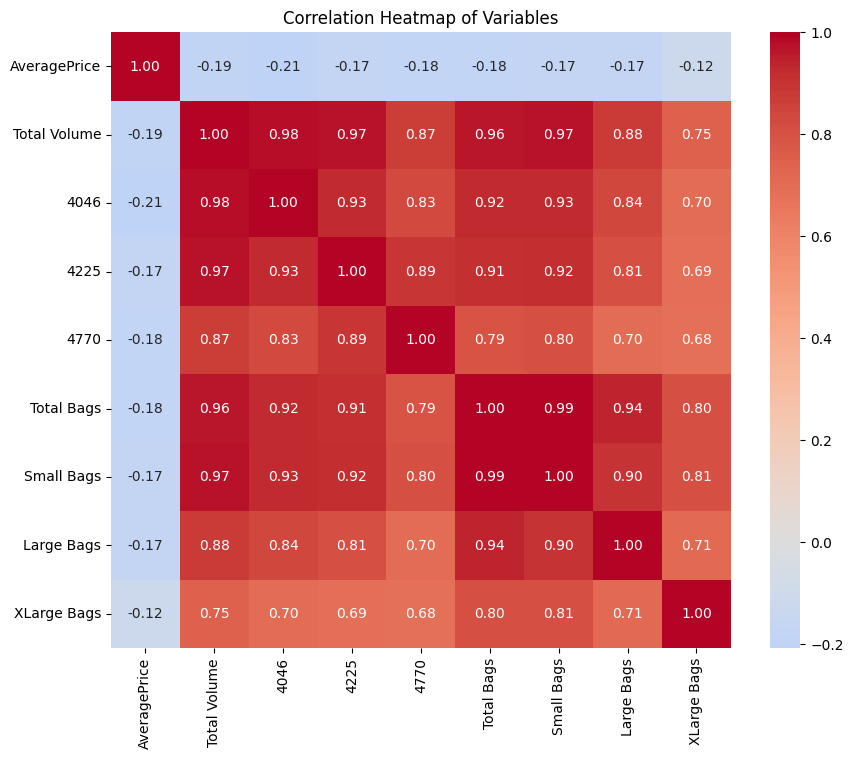

AveragePrice    1.000000
XLarge Bags    -0.117604
Large Bags     -0.172948
4225           -0.172948
Small Bags     -0.174738
Total Bags     -0.177103
4770           -0.179463
Total Volume   -0.192772
4046           -0.208334
Name: AveragePrice, dtype: float64


In [ ]:
# Write your code here
numerical_df = df.select_dtypes(include=['number'])

# 2. Calculate the correlation matrix
corr_matrix = numerical_df.corr()

# 3. Visualize using a Heatmap
plt.figure(figsize=(10, 8))
sn.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Correlation Heatmap of Variables")
plt.show()

# Display the correlations specifically for your target (e.g., AveragePrice)
print(corr_matrix['AveragePrice'].sort_values(ascending=False))

The dataset contains both numerical and categorical variables.
Numerical variables include AveragePrice, Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, and XLarge Bags.
Categorical variables include Date, type, year, and region.



#3. Exploratory Data Analysis (EDA)


3.1 Describe the variables
- Describe all variables in the dataset.
- For continuous variables: report **range (min, max), mean, median, and distribution**.
- For categorical variables: list unique values.

Continuous Variables Summary
                Min          Max        Range           Mean      Median
AveragePrice   0.44         3.25         2.81       1.406032       1.370
Total Volume  84.56  62505646.52  62505561.96  850511.593384  107354.250
4046           0.00  22743616.17  22743616.17  292961.276440    8643.200
4225           0.00  20470572.61  20470572.61  295107.969480   29056.730
4770           0.00   2546439.11   2546439.11   22836.031945     184.990
Total Bags     0.00  19373134.37  19373134.37  239613.964021   39738.530
Small Bags     0.00  13384586.80  13384586.80  182185.215853   26351.615
Large Bags     0.00   5719096.61   5719096.61   54335.113033    2647.270
XLarge Bags    0.00    551693.65    551693.65    3106.086096       0.000


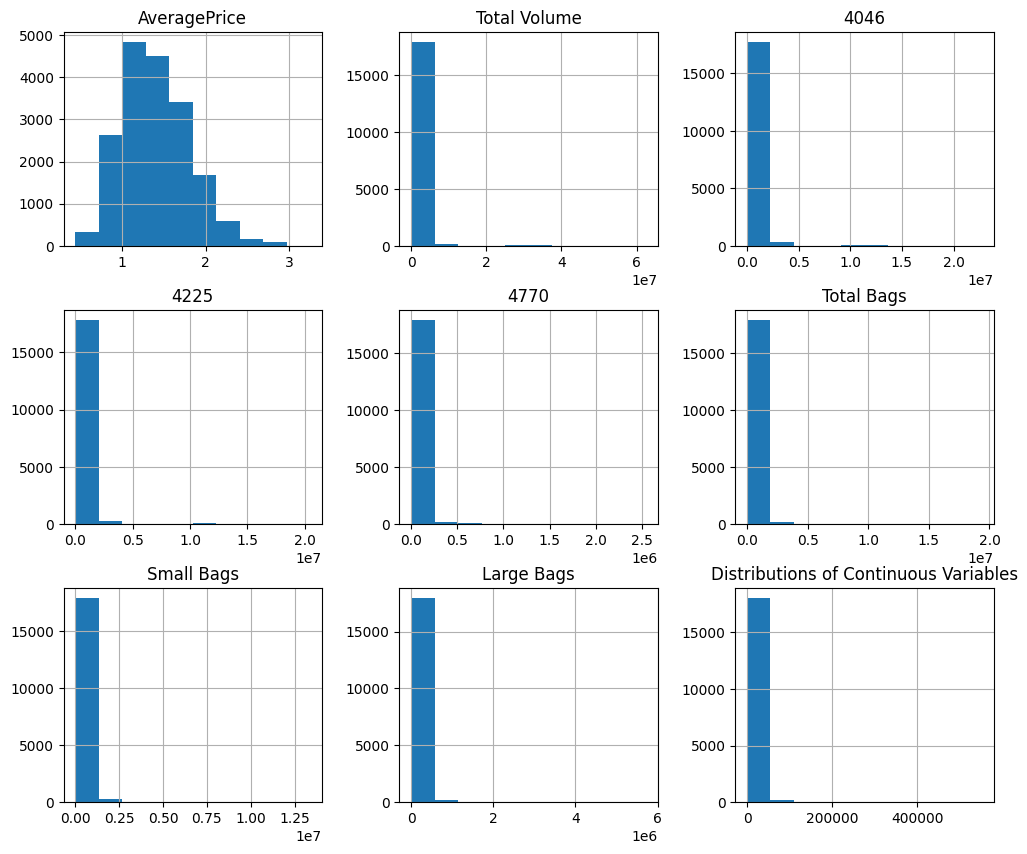

In [ ]:
# Write your code here
#numerical_df is already defined in #2.4
summary = pd.DataFrame({
    "Min": numerical_df.min(),
    "Max": numerical_df.max(),
    "Range": numerical_df.max() - numerical_df.min(),
    "Mean": numerical_df.mean(),
    "Median": numerical_df.median()
})

print("Continuous Variables Summary")
print(summary)

# Distributions
numerical_df.hist(figsize=(12, 10))
plt.title("Distributions of Continuous Variables")
plt.show()


The continuous variables show very different scales and distributions across the dataset. AveragePrice ranges from 0.44 to 3.25 with a mean of about 1.41 and a median of 1.37, indicating that avocado prices are fairly stable and centered around
1.50. In contrast, all volume-related variables (Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags) have extremely large ranges, showing that sales volumes vary widely by region and time. For most of these volume variables, the mean is much larger than the median, which suggests right-skewed distributions where a small number of very large sales values pull the average upward. Several variables also have a minimum of 0, indicating that some categories had no sales in certain weeks or regions. This tells us that price is relatively stable while volume features are highly variable and skewed.


In [ ]:
# Select categorical columns first
categorical_df = df.select_dtypes(exclude='number')

print("Categorical Variables Summary\n")

for col in categorical_df.columns:
    print(f"{col}")
    print("Number of unique values:", categorical_df[col].nunique())

    # If few categories, print all; otherwise show us first 10; this will help to minimize clutter
    if categorical_df[col].nunique() <= 10:
        print("Unique values:", categorical_df[col].unique())
    else:
        print("Sample of unique values:", categorical_df[col].unique()[:10])

    print()


Categorical Variables Summary

Date
Number of unique values: 170
Sample of unique values: ['12-27-2015' '12-20-2015' '12-13-2015' '12-6-2015' '11-29-2015'
 '11-22-2015' '11-15-2015' '11-8-2015' '11-1-2015' '10-25-2015']

type
Number of unique values: 2
Unique values: ['conventional' 'organic']

year
Number of unique values: 5
Unique values: ['2015' '2016' '2017' '2018' '1904']

region
Number of unique values: 54
Sample of unique values: ['Albany' 'Atlanta' 'BaltimoreWashington' 'Boise' 'Boston'
 'BuffaloRochester' 'California' 'Charlotte' 'Chicago' 'CincinnatiDayton']



The categorical variables in the dataset are Date, type, year, and region. The Date variable has 170 unique values, the type variable has only 2 categories (conventional and organic), the year variable contains 5 unique values (2015, 2016, 2017, 2018, and 1904), which represent different years in the dataset. The region variable has 54 unique values, representing different geographic areas. Some categorical features have very few categories (type), while others (Date and region) have many.

3.2 Inspect the earliest recorded date
- Find the earliest `Date`.
- Check if there are avocado prices recorded from the earliest date up to 2010.
- Comment: does the earliest data point look reasonable? Keep or remove?

In [ ]:
# Write your code here
df['Date'] = pd.to_datetime(df['Date']) # Converting Date to datetime first.

#Note to self:
#We can still do it without changing into datetime(NO syntax error when Date col would be a string type, but it gave a wrong result. The earliest recorded date given was 1-1-2017. WHY?

# Earliest date
earliest_date = df['Date'].min()
print("Earliest recorded date:", earliest_date)


Earliest recorded date: 1904-01-21 00:00:00


In [ ]:
before_2010 = df[df['Date'] <= pd.to_datetime("2010-12-31")]

print("Number of records before 2010:", len(before_2010))
before_2010.head() #just to see the sample

Number of records before 2010: 1


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18250,1904-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.8,42.31,0.0,organic,1904,WestTexNewMexico


There are no consistent records covering the period from the earliest date up to 2010, only a single isolated data point. This makes the 1904 entry unreasonable in the context of the rest of the dataset and strongly suggests it is a data error or outlier. Therefore, this earliest data point should be removed from the dataset before further analysis or modeling.

3.3 Highest average price
- Find the highest value in "AveragePrice".
- Report which region it belongs to.
- Describe how you obtained the result.

In [ ]:
# Write your code here
# Max AveragePrice
max_avg_price = df['AveragePrice'].max()
print("Highest AveragePrice:", max_avg_price)

# Rows with that maximum price
max_avg_price_rows = df[df['AveragePrice'] == max_avg_price]

print("\nRows with highest AveragePrice:")
max_avg_price_rows[['Date', 'region', 'AveragePrice']]


Highest AveragePrice: 3.25

Rows with highest AveragePrice:


,Date,region,AveragePrice
14125,2016-10-30,SanFrancisco,3.25


The highest value of the AveragePrice variable was found using the max() function on the AveragePrice column. Then, the dataset was filtered to select the rows where AveragePrice equals this maximum value. From the resulting row, the region associated with the highest price was identified as SanFrancisco.

3.4 Highest total volume
- Find the highest total volume of avocados.
- Report which region it belongs to.
- Describe how you obtained the result.

In [ ]:
# Write your code here
# Max Total Volume
max_total_volume = df['Total Volume'].max()
print("Highest Total Volume:", max_total_volume)

# Rows with that maximum volume
max_volume_rows = df[df['Total Volume'] == max_total_volume]

print("\nRows with highest Total Volume:")
max_volume_rows[['Date', 'region', 'Total Volume']]



Highest Total Volume: 62505646.52

Rows with highest Total Volume:


,Date,region,Total Volume
9097,2018-02-04,TotalUS,62505646.52


Like I previously did, I found the maximum value of the Total Volume using the max() function on the Total Volume column. Then, the dataset was filtered to select the rows where Total Volume equals this maximum value. From the resulting row, the region associated with the highest total volume was identified as TotalUS.

